In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Supervised Learning/csv files/penguins_size.csv')

In [5]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [6]:
df['species'].value_counts()

,count
species,
Adelie,152
Gentoo,124
Chinstrap,68


In [7]:
df['island'].value_counts()

,count
island,
Biscoe,168
Dream,124
Torgersen,52


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [9]:
df = df.dropna()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


<Axes: xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

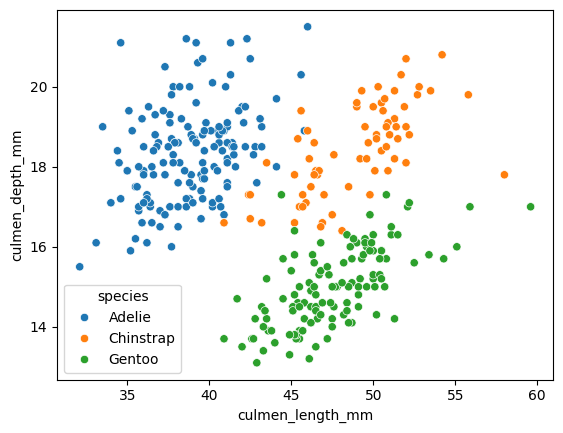

In [11]:
sns.scatterplot(data= df,x='culmen_length_mm',y = 'culmen_depth_mm',hue='species')

In [12]:
df['species'].value_counts()

,count
species,
Adelie,146
Gentoo,120
Chinstrap,68


###just by looking at this we can predict the species of penguine if we know clumen depth and length ,but not always cz we can see that there are some outliers as always

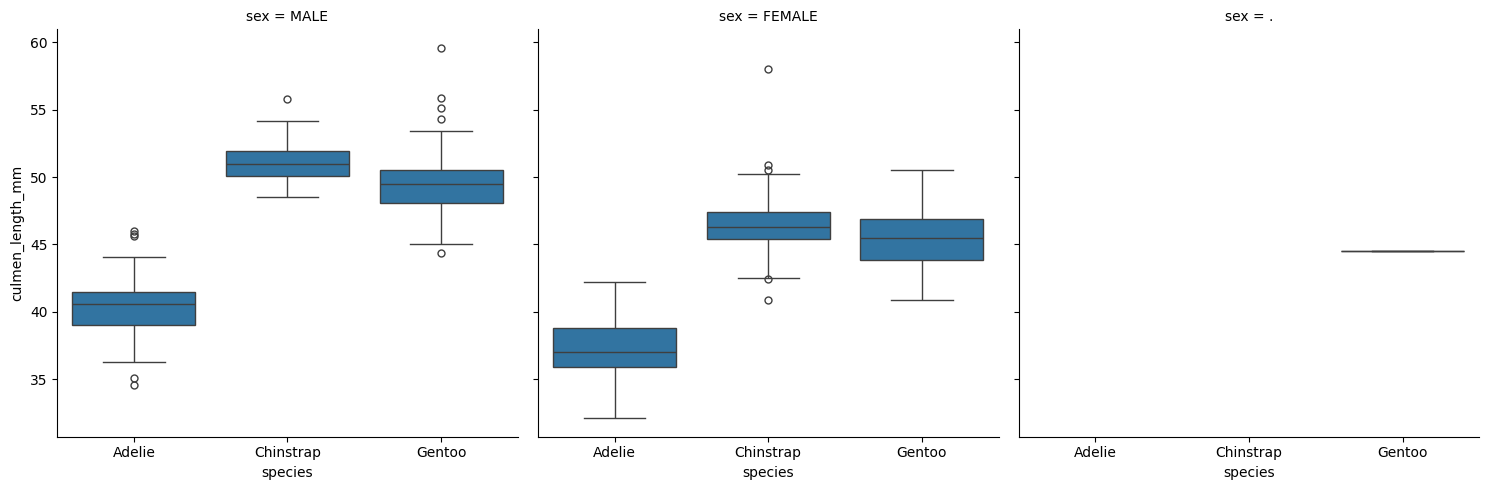

In [13]:
sns.catplot(x='species',y='culmen_length_mm',data=df,kind='box',col='sex')

####wtf is that third diagram , there is something wrong with our data ,we gotta fix that (this is why data visualization is so important , it helps us a lot to figure out issues with data)

In [14]:
df['sex'].value_counts()

,count
sex,
MALE,168
FEMALE,165
.,1


In [15]:
df[df['sex']=='.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


#### we can definetely drop this and it would be an easy fix but why not try to assign it the sex when we have so much data availible and we can use that data to predict the gender of it , we have species given and the culmen length and depth as well so yeah let's do it

In [16]:
df[df['species']=='Gentoo'].groupby('sex').describe().transpose()

sex                           .       FEMALE         MALE
culmen_length_mm  count     1.0    58.000000    61.000000
                  mean     44.5    45.563793    49.473770
                  std       NaN     2.051247     2.720594
                  min      44.5    40.900000    44.400000
                  25%      44.5    43.850000    48.100000
                  50%      44.5    45.500000    49.500000
                  75%      44.5    46.875000    50.500000
                  max      44.5    50.500000    59.600000
culmen_depth_mm   count     1.0    58.000000    61.000000
                  mean     15.7    14.237931    15.718033
                  std       NaN     0.540249     0.741060
                  min      15.7    13.100000    14.100000
                  25%      15.7    13.800000    15.200000
                  50%      15.7    14.250000    15.700000
                  75%      15.7    14.600000    16.100000
                  max      15.7    15.500000    17.300000
flipper_length_mm count     1.0    58.000000    61.000000
                  mean    217.0   212.706897   221.540984
                  std       NaN     3.897856     5.673252
                  min     217.0   203.000000   208.000000
                  25%     217.0   210.000000   218.000000
                  50%     217.0   212.000000   221.000000
                  75%     217.0   215.000000   225.000000
                  max     217.0   222.000000   231.000000
body_mass_g       count     1.0    58.000000    61.000000
                  mean   4875.0  4679.741379  5484.836066
                  std       NaN   281.578294   313.158596
                  min    4875.0  3950.000000  4750.000000
                  25%    4875.0  4462.500000  5300.000000
                  50%    4875.0  4700.000000  5500.000000
                  75%    4875.0  4875.000000  5700.000000
                  max    4875.0  5200.000000  6300.000000

###with careful observation and comparison , we assume that the missing gender was most likely female so we gonna replace it with that


In [17]:
df['sex']=df['sex'].replace('.','FEMALE')

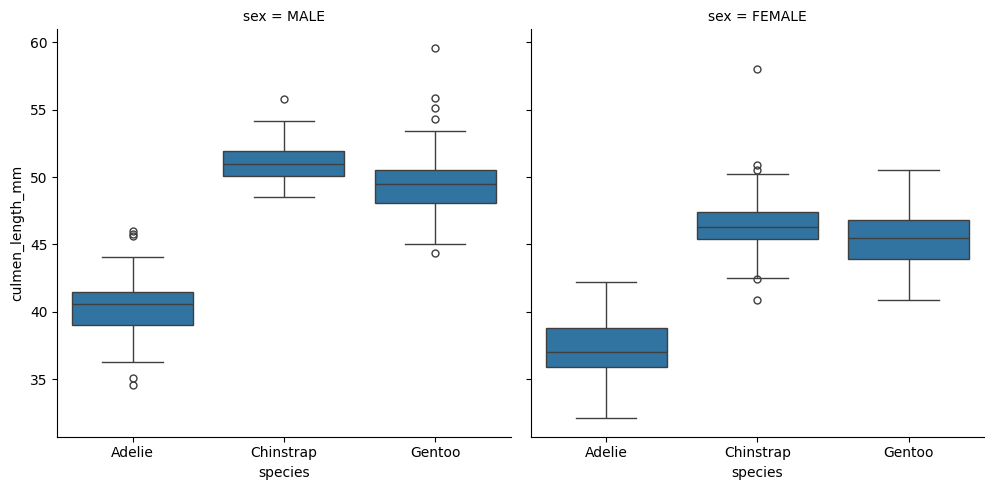

In [18]:
sns.catplot(x='species',y='culmen_length_mm',data=df,kind='box',col='sex')

###done with that '.' now time to do some feature engineering

#Feature Engineering

In [19]:
pd.get_dummies(df) #get_dummies creates based on every categorical column

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,True,False,False,False,False,True,False,True
1,39.5,17.4,186.0,3800.0,True,False,False,False,False,True,True,False
2,40.3,18.0,195.0,3250.0,True,False,False,False,False,True,True,False
4,36.7,19.3,193.0,3450.0,True,False,False,False,False,True,True,False
5,39.3,20.6,190.0,3650.0,True,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,False,False,True,True,False,False,True,False
340,46.8,14.3,215.0,4850.0,False,False,True,True,False,False,True,False
341,50.4,15.7,222.0,5750.0,False,False,True,True,False,False,False,True
342,45.2,14.8,212.0,5200.0,False,False,True,True,False,False,True,False


In [21]:
X = pd.get_dummies(df.drop('species',axis=1),drop_first=True) #this will drop the first species column only
Y = df['species']

#Train Test Split

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state= 15)

In [22]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [24]:
model.fit(X_train,Y_train)

GaussianNB()

In [26]:
y_pred = model.predict(X_test)
y_pred

array(['Chinstrap', 'Adelie', 'Adelie', 'Chinstrap', 'Adelie',
       'Chinstrap', 'Adelie', 'Chinstrap', 'Chinstrap', 'Gentoo',
       'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Gentoo', 'Chinstrap',
       'Gentoo', 'Gentoo', 'Chinstrap', 'Adelie', 'Adelie', 'Chinstrap',
       'Chinstrap', 'Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Gentoo',
       'Chinstrap', 'Gentoo', 'Chinstrap', 'Chinstrap', 'Gentoo',
       'Adelie', 'Chinstrap', 'Gentoo', 'Chinstrap', 'Adelie', 'Adelie',
       'Chinstrap', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Chinstrap', 'Adelie', 'Chinstrap',
       'Chinstrap', 'Adelie', 'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo',
       'Gentoo', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie', 'Gentoo',
       'Chinstrap', 'Adelie', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Chinstrap',
       'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Gentoo',
       'Chinstrap', 

#Model Evaluation

In [27]:
from sklearn.metrics import confusion_matrix ,classification_report

In [28]:
confusion_matrix(Y_test,y_pred)

array([[32, 11,  0],
       [ 0, 22,  0],
       [ 0,  0, 36]])

In [29]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

      Adelie       1.00      0.74      0.85        43
   Chinstrap       0.67      1.00      0.80        22
      Gentoo       1.00      1.00      1.00        36

    accuracy                           0.89       101
   macro avg       0.89      0.91      0.88       101
weighted avg       0.93      0.89      0.89       101

